In [80]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import metpy.calc as mpcalc
from metpy.units import units
from matplotlib.colors import Normalize
from scipy.ndimage import binary_erosion, generic_filter
import matplotlib.cm as cm
from pandas import DataFrame, Index
import os
from scipy.ndimage import uniform_filter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

# NWP #
inputs_POLY_NWP = [
    (NWP_pred_18_0407, NWP_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (NWP_pred_12_0407, NWP_gt_00_0507, 12, '05/07/2023 00 UTC'),
    (NWP_pred_06_0407, NWP_gt_00_0507, 18, '05/07/2023 00 UTC'),
    (NWP_pred_00_0407, NWP_gt_00_0507, 24, '05/07/2023 00 UTC'),
    (NWP_pred_18_0307, NWP_gt_00_0507, 30, '05/07/2023 00 UTC'),
    (NWP_pred_12_0307, NWP_gt_00_0507, 36, '05/07/2023 00 UTC'),
    (NWP_pred_06_0307, NWP_gt_00_0507, 42, '05/07/2023 00 UTC'),
    (NWP_pred_00_0307, NWP_gt_00_0507, 48, '05/07/2023 00 UTC'),
    (NWP_pred_18_0207, NWP_gt_00_0507, 54, '05/07/2023 00 UTC'),
    (NWP_pred_12_0207, NWP_gt_00_0507, 60, '05/07/2023 00 UTC'),
    (NWP_pred_06_0207, NWP_gt_00_0507, 66, '05/07/2023 00 UTC'),

    (NWP_pred_00_0507, NWP_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (NWP_pred_18_0407, NWP_gt_06_0507, 12, '05/07/2023 06 UTC'),
    (NWP_pred_12_0407, NWP_gt_06_0507, 18, '05/07/2023 06 UTC'),
    (NWP_pred_06_0407, NWP_gt_06_0507, 24, '05/07/2023 06 UTC'),
    (NWP_pred_00_0407, NWP_gt_06_0507, 30, '05/07/2023 06 UTC'),
    (NWP_pred_18_0307, NWP_gt_06_0507, 36, '05/07/2023 06 UTC'),
    (NWP_pred_12_0307, NWP_gt_06_0507, 42, '05/07/2023 06 UTC'),
    (NWP_pred_06_0307, NWP_gt_06_0507, 48, '05/07/2023 06 UTC'),
    (NWP_pred_00_0307, NWP_gt_06_0507, 54, '05/07/2023 06 UTC'),
    (NWP_pred_18_0207, NWP_gt_06_0507, 60, '05/07/2023 06 UTC'),
    (NWP_pred_12_0207, NWP_gt_06_0507, 66, '05/07/2023 06 UTC'),

    (NWP_pred_06_0507, NWP_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (NWP_pred_00_0507, NWP_gt_12_0507, 12, '05/07/2023 12 UTC'),
    (NWP_pred_18_0407, NWP_gt_12_0507, 18, '05/07/2023 12 UTC'),
    (NWP_pred_12_0407, NWP_gt_12_0507, 24, '05/07/2023 12 UTC'),
    (NWP_pred_06_0407, NWP_gt_12_0507, 30, '05/07/2023 12 UTC'),
    (NWP_pred_00_0407, NWP_gt_12_0507, 36, '05/07/2023 12 UTC'),
    (NWP_pred_18_0307, NWP_gt_12_0507, 42, '05/07/2023 12 UTC'),
    (NWP_pred_12_0307, NWP_gt_12_0507, 48, '05/07/2023 12 UTC'),
    (NWP_pred_06_0307, NWP_gt_12_0507, 54, '05/07/2023 12 UTC'),
    (NWP_pred_00_0307, NWP_gt_12_0507, 60, '05/07/2023 12 UTC'),
    (NWP_pred_18_0207, NWP_gt_12_0507, 66, '05/07/2023 12 UTC'),
 
    (NWP_pred_12_0507, NWP_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (NWP_pred_06_0507, NWP_gt_18_0507, 12, '05/07/2023 18 UTC'),
    (NWP_pred_00_0507, NWP_gt_18_0507, 18, '05/07/2023 18 UTC'),
    (NWP_pred_18_0407, NWP_gt_18_0507, 24, '05/07/2023 18 UTC'),
    (NWP_pred_12_0407, NWP_gt_18_0507, 30, '05/07/2023 18 UTC'),
    (NWP_pred_06_0407, NWP_gt_18_0507, 36, '05/07/2023 18 UTC'),
    (NWP_pred_00_0407, NWP_gt_18_0507, 42, '05/07/2023 18 UTC'),
    (NWP_pred_18_0307, NWP_gt_18_0507, 48, '05/07/2023 18 UTC'),
    (NWP_pred_12_0307, NWP_gt_18_0507, 54, '05/07/2023 18 UTC'),
    (NWP_pred_06_0307, NWP_gt_18_0507, 60, '05/07/2023 18 UTC'),
    (NWP_pred_00_0307, NWP_gt_18_0507, 66, '05/07/2023 18 UTC')
]

In [3]:
data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

# DDM inputs
inputs_POLY_DDM = [
    (DDM_pred_18_0407, DDM_gt_00_0507, 1, '05/07/2023 00 UTC'),
    (DDM_pred_12_0407, DDM_gt_00_0507, 2, '05/07/2023 00 UTC'),
    (DDM_pred_06_0407, DDM_gt_00_0507, 3, '05/07/2023 00 UTC'),
    (DDM_pred_00_0407, DDM_gt_00_0507, 4, '05/07/2023 00 UTC'),
    (DDM_pred_18_0307, DDM_gt_00_0507, 5, '05/07/2023 00 UTC'),
    (DDM_pred_12_0307, DDM_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (DDM_pred_06_0307, DDM_gt_00_0507, 7, '05/07/2023 00 UTC'),
    (DDM_pred_00_0307, DDM_gt_00_0507, 8, '05/07/2023 00 UTC'),
    (DDM_pred_18_0207, DDM_gt_00_0507, 9, '05/07/2023 00 UTC'),
    (DDM_pred_12_0207, DDM_gt_00_0507, 10, '05/07/2023 00 UTC'),
    (DDM_pred_06_0207, DDM_gt_00_0507, 11, '05/07/2023 00 UTC'),

    (DDM_pred_00_0507, DDM_gt_06_0507, 1, '05/07/2023 06 UTC'),
    (DDM_pred_18_0407, DDM_gt_06_0507, 2, '05/07/2023 06 UTC'),
    (DDM_pred_12_0407, DDM_gt_06_0507, 3, '05/07/2023 06 UTC'),
    (DDM_pred_06_0407, DDM_gt_06_0507, 4, '05/07/2023 06 UTC'),
    (DDM_pred_00_0407, DDM_gt_06_0507, 5, '05/07/2023 06 UTC'),
    (DDM_pred_18_0307, DDM_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (DDM_pred_12_0307, DDM_gt_06_0507, 7, '05/07/2023 06 UTC'),
    (DDM_pred_06_0307, DDM_gt_06_0507, 8, '05/07/2023 06 UTC'),
    (DDM_pred_00_0307, DDM_gt_06_0507, 9, '05/07/2023 06 UTC'),
    (DDM_pred_18_0207, DDM_gt_06_0507, 10, '05/07/2023 06 UTC'),
    (DDM_pred_12_0207, DDM_gt_06_0507, 11, '05/07/2023 06 UTC'),
    
    (DDM_pred_06_0507, DDM_gt_12_0507, 1, '05/07/2023 12 UTC'),
    (DDM_pred_00_0507, DDM_gt_12_0507, 2, '05/07/2023 12 UTC'),
    (DDM_pred_18_0407, DDM_gt_12_0507, 3, '05/07/2023 12 UTC'),
    (DDM_pred_12_0407, DDM_gt_12_0507, 4, '05/07/2023 12 UTC'),
    (DDM_pred_06_0407, DDM_gt_12_0507, 5, '05/07/2023 12 UTC'),
    (DDM_pred_00_0407, DDM_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (DDM_pred_18_0307, DDM_gt_12_0507, 7, '05/07/2023 12 UTC'),
    (DDM_pred_12_0307, DDM_gt_12_0507, 8, '05/07/2023 12 UTC'),
    (DDM_pred_06_0307, DDM_gt_12_0507, 9, '05/07/2023 12 UTC'),
    (DDM_pred_00_0307, DDM_gt_12_0507, 10, '05/07/2023 12 UTC'),
    (DDM_pred_18_0207, DDM_gt_12_0507, 11, '05/07/2023 12 UTC'),
    
    (DDM_pred_12_0507, DDM_gt_18_0507, 1, '05/07/2023 18 UTC'),
    (DDM_pred_06_0507, DDM_gt_18_0507, 2, '05/07/2023 18 UTC'),
    (DDM_pred_00_0507, DDM_gt_18_0507, 3, '05/07/2023 18 UTC'),
    (DDM_pred_18_0407, DDM_gt_18_0507, 4, '05/07/2023 18 UTC'),
    (DDM_pred_12_0407, DDM_gt_18_0507, 5, '05/07/2023 18 UTC'),
    (DDM_pred_06_0407, DDM_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (DDM_pred_00_0407, DDM_gt_18_0507, 7, '05/07/2023 18 UTC'),
    (DDM_pred_18_0307, DDM_gt_18_0507, 8, '05/07/2023 18 UTC'),
    (DDM_pred_12_0307, DDM_gt_18_0507, 9, '05/07/2023 18 UTC'),
    (DDM_pred_06_0307, DDM_gt_18_0507, 10, '05/07/2023 18 UTC'),
    (DDM_pred_00_0307, DDM_gt_18_0507, 11, '05/07/2023 18 UTC')
]

In [4]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    """
    Calculate the optimal rotation angles for each grid point to align DDM winds with NWP winds.
    
    Parameters:
    u_DDM (ndarray): U-component of wind from DDM
    v_DDM (ndarray): V-component of wind from DDM
    u_NWP (ndarray): U-component of wind from NWP
    v_NWP (ndarray): V-component of wind from NWP
    
    Returns:
    ndarray: Matrix of rotation angles (in radians) for each grid point
    """
    # Initialize the angle matrix
    angles = np.zeros_like(u_DDM)
    
    # Calculate angle for each grid point
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            # Get wind components for current grid point
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            
            # Calculate the angle that rotates DDM wind to NWP wind
            # Using the atan2 of the cross and dot products
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    
    return angles

def rotate_wind_3D(u, v, angle_rad):
    """
    Rotate wind components u, v (shape: levels x ny x nx) by a 2D angle (ny x nx)
    independently at each pressure level.

    Parameters:
        u: 3D array (n_levels, ny, nx)
        v: 3D array (same shape as u)
        angle_rad: 2D array (ny, nx)

    Returns:
        u_rot, v_rot: rotated wind components (same shape as u and v)
    """
    # Expand angle_rad to (1, ny, nx) so it broadcasts over pressure levels
    angle_rad_expanded = angle_rad[None, :, :]

    # Apply rotation
    u_rot = u * np.cos(angle_rad_expanded) - v * np.sin(angle_rad_expanded)
    v_rot = u * np.sin(angle_rad_expanded) + v * np.cos(angle_rad_expanded)

    return u_rot, v_rot

def prepare_datasets_NWP(data_pred, data_gt, lead_time, lat, lon):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]].values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]].values
    
    # Predictions data
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    u_pred_multiple_pl = CUT_CENTRE_u_PRED.values    
    
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_multiple_pl = CUT_CENTRE_v_PRED.values
    
    CUT_CENTRE_w_PRED = data_pred['upward_air_velocity_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    w_pred_multiple_pl = CUT_CENTRE_w_PRED.values
    
    CUT_CENTRE_T_PRED = data_pred['air_temperature_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    T_pred_multiple_pl = CUT_CENTRE_T_PRED.values

    CUT_CENTRE_sh_PRED = data_pred['specific_humidity_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    sh_pred_multiple_pl = CUT_CENTRE_sh_PRED.values
    
    # Ground-Truth data
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_multiple_pl = CUT_CENTRE_u_GT.values    
    
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_multiple_pl = CUT_CENTRE_v_GT.values
    
    CUT_CENTRE_w_GT = data_gt['upward_air_velocity_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    w_gt_multiple_pl = CUT_CENTRE_w_GT.values
    
    CUT_CENTRE_T_GT = data_gt['air_temperature_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    T_gt_multiple_pl = CUT_CENTRE_T_GT.values

    CUT_CENTRE_sh_GT = data_gt['specific_humidity_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    sh_gt_multiple_pl = CUT_CENTRE_sh_GT.values

    return u_pred_multiple_pl, u_gt_multiple_pl, v_pred_multiple_pl, v_gt_multiple_pl, w_pred_multiple_pl, w_gt_multiple_pl, T_pred_multiple_pl, T_gt_multiple_pl, sh_pred_multiple_pl, sh_gt_multiple_pl


def prepare_datasets_DDM(angles, data_pred, data_gt, lead_time, lat, lon):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]].values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]].values
    
    # Predictions data
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    u_pred_multiple_pl = CUT_CENTRE_u_PRED.values    
    
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_multiple_pl = CUT_CENTRE_v_PRED.values
    
    CUT_CENTRE_w_PRED = data_pred['vertical_velocity_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    w_pred_multiple_pl = CUT_CENTRE_w_PRED.values
    
    CUT_CENTRE_T_PRED = data_pred['air_temperature_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    T_pred_multiple_pl = CUT_CENTRE_T_PRED.values

    CUT_CENTRE_sh_PRED = data_pred['specific_humidity_pl'][lead_time, :, lat[0]:lat[1], lon[0]:lon[1]]
    sh_pred_multiple_pl = CUT_CENTRE_sh_PRED.values

    u_pred_multiple_pl, v_pred_multiple_pl = rotate_wind_3D(u_pred_multiple_pl,v_pred_multiple_pl,angles)            #-np.pi/13.75831)

    # Ground-Truth data
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_multiple_pl = CUT_CENTRE_u_GT.values    
    
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_multiple_pl = CUT_CENTRE_v_GT.values
    
    CUT_CENTRE_w_GT = data_gt['vertical_velocity_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    w_gt_multiple_pl = CUT_CENTRE_w_GT.values
    
    CUT_CENTRE_T_GT = data_gt['air_temperature_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    T_gt_multiple_pl = CUT_CENTRE_T_GT.values

    CUT_CENTRE_sh_GT = data_gt['specific_humidity_pl'][0, :, lat[0]:lat[1], lon[0]:lon[1]]
    sh_gt_multiple_pl = CUT_CENTRE_sh_GT.values

    u_gt_multiple_pl, v_gt_multiple_pl = rotate_wind_3D(u_gt_multiple_pl,v_gt_multiple_pl,angles)            

    return u_pred_multiple_pl, u_gt_multiple_pl, v_pred_multiple_pl, v_gt_multiple_pl, w_pred_multiple_pl, w_gt_multiple_pl, T_pred_multiple_pl, T_gt_multiple_pl, sh_pred_multiple_pl, sh_gt_multiple_pl

In [5]:
LAT_NWP = [8,451]
LON_NWP = [8,451]

LAT_DDM = [7,450]
LON_DDM = [7,450]

u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, 7:450, 7:450]
u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)

u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, 8:451, 8:451]
u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)

v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, 7:450, 7:450]
v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)

v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, 8:451, 8:451]
v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)

angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)

In [6]:
#NWP
datasets_NWP = []
    
for i, (data_pred, data_gt, lead_time, time) in enumerate(inputs_POLY_NWP):
    u_pred_multiple_pl, u_gt_multiple_pl, v_pred_multiple_pl, v_gt_multiple_pl, w_pred_multiple_pl, w_gt_multiple_pl, T_pred_multiple_pl, T_gt_multiple_pl, sh_pred_multiple_pl, sh_gt_multiple_pl = prepare_datasets_NWP(data_pred, data_gt, lead_time, LAT_NWP, LON_NWP)
    
    datasets_NWP.append([u_pred_multiple_pl, u_gt_multiple_pl, v_pred_multiple_pl, v_gt_multiple_pl, w_pred_multiple_pl, w_gt_multiple_pl, T_pred_multiple_pl, T_gt_multiple_pl, sh_pred_multiple_pl, sh_gt_multiple_pl])

datasets_NWP = np.array(datasets_NWP)

In [7]:
#DDM
datasets_DDM = []
    
for i, (data_pred, data_gt, lead_time, time) in enumerate(inputs_POLY_DDM):
    u_pred_multiple_pl, u_gt_multiple_pl, v_pred_multiple_pl, v_gt_multiple_pl, w_pred_multiple_pl, w_gt_multiple_pl, T_pred_multiple_pl, T_gt_multiple_pl, sh_pred_multiple_pl, sh_gt_multiple_pl = prepare_datasets_DDM(angles, data_pred, data_gt, lead_time, LAT_DDM, LON_DDM)
    
    datasets_DDM.append([u_pred_multiple_pl, u_gt_multiple_pl, v_pred_multiple_pl, v_gt_multiple_pl, w_pred_multiple_pl, w_gt_multiple_pl, T_pred_multiple_pl, T_gt_multiple_pl, sh_pred_multiple_pl, sh_gt_multiple_pl])

datasets_DDM = np.array(datasets_DDM)

In [8]:
p = np.array([1000., 925., 850., 700., 500., 400., 300., 250., 200., 150., 100., 50.])

def convert_wz_in_wp(wz, T, sh, p):
    rho = (p*100) / (287 * T * (1 + 0.61 * sh))
    g = 9.80665
    wp = -rho*g*wz       
    return wp

#Prepare DDM datasets
u_pred_DDM = datasets_DDM[:, 0, ::-1, :, :] 
u_gt_DDM = datasets_DDM[:, 1, ::-1, :, :]   
v_pred_DDM = datasets_DDM[:, 2, ::-1, :, :] 
v_gt_DDM = datasets_DDM[:, 3, ::-1, :, :]  
wp_pred_DDM = datasets_DDM[:, 4, ::-1, :, :] 
wp_gt_DDM = datasets_DDM[:, 5, ::-1, :, :]  
T_pred_DDM = datasets_DDM[:, 6, ::-1, :, :] 
T_gt_DDM = datasets_DDM[:, 7, ::-1, :, :]   
sh_pred_DDM = datasets_DDM[:, 8, ::-1, :, :] 
sh_gt_DDM = datasets_DDM[:, 9, ::-1, :, :]   

#Prepare NWP datasets
u_pred_NWP = np.delete(datasets_NWP[:, 0, :, :, :], 9, axis=1)
u_gt_NWP = np.delete(datasets_NWP[:, 1, :, :, :], 9, axis=1)
v_pred_NWP = np.delete(datasets_NWP[:, 2, :, :, :], 9, axis=1)
v_gt_NWP = np.delete(datasets_NWP[:, 3, :, :, :], 9, axis=1)
w_pred_NWP = np.delete(datasets_NWP[:, 4, :, :, :], 9, axis=1)
w_gt_NWP = np.delete(datasets_NWP[:, 5, :, :, :], 9, axis=1)
T_pred_NWP = np.delete(datasets_NWP[:, 6, :, :, :], 9, axis=1)
T_gt_NWP = np.delete(datasets_NWP[:, 7, :, :, :], 9, axis=1)
sh_pred_NWP = np.delete(datasets_NWP[:, 8, :, :, :], 9, axis=1)
sh_gt_NWP = np.delete(datasets_NWP[:, 9, :, :, :], 9, axis=1)

u_pred_NWP = u_pred_NWP[:,::-1,:,:]
u_gt_NWP = u_gt_NWP[:,::-1,:,:]
v_pred_NWP = v_pred_NWP[:,::-1,:,:]
v_gt_NWP = v_gt_NWP[:,::-1,:,:]
w_pred_NWP = w_pred_NWP[:,::-1,:,:]
w_gt_NWP = w_gt_NWP[:,::-1,:,:]
T_pred_NWP = T_pred_NWP[:,::-1,:,:]
T_gt_NWP = T_gt_NWP[:,::-1,:,:]
sh_pred_NWP = sh_pred_NWP[:,::-1,:,:]
sh_gt_NWP = sh_gt_NWP[:,::-1,:,:]
p_4d = p.reshape(1, 12, 1, 1)
wp_pred_NWP = convert_wz_in_wp(w_pred_NWP, T_pred_NWP, sh_pred_NWP, p_4d)
wp_gt_NWP = convert_wz_in_wp(w_gt_NWP, T_gt_NWP, sh_gt_NWP, p_4d)

In [9]:
def residual_mass_continuity(u, v, wp, p):
    # Inizializza array per i risultati
    difference_wp = np.zeros_like(u)
    integral_dhw = np.zeros_like(u)
    R = np.zeros_like(u)
    R_ms = np.zeros_like(u)

    # Loop sui livelli (escluso l'ultimo, perché si lavora su i e i+1)
    for i in range(len(p) - 1):
        du_dy = np.gradient(u, 2500, axis=2)  
        du_dx = np.gradient(u, 2500, axis=3) 

        dv_dy = np.gradient(v, 2500, axis=2)
        dv_dx = np.gradient(v, 2500, axis=3)
        
        # Differenza verticale di wp
        difference_wp[:, i, :, :] = -(wp[:, i + 1, :, :] - wp[:, i, :, :])
        # Integrale del divergenza orizzontale
        mean_divergence_horizontal_wind = 0.5 * (du_dx[:, i + 1, :, :] + dv_dy[:, i + 1, :, :] + du_dx[:, i, :, :] + dv_dy[:, i, :, :])
        integral_dhw[:, i, :, :] = -mean_divergence_horizontal_wind * (p[i + 1] - p[i])*100
        
        # Residuo della continuità
        R[:, i, :, :] = difference_wp[:, i, :, :] + integral_dhw[:, i, :, :]

    return difference_wp, integral_dhw, R

In [12]:
difference_wp_NWP_pred, integral_dhw_NWP_pred, R_NWP_pred = residual_mass_continuity(u_pred_NWP,v_pred_NWP,wp_pred_NWP,p)

In [13]:
difference_wp_DDM_pred, integral_dhw_DDM_pred, R_DDM_pred = residual_mass_continuity(u_pred_DDM, v_pred_DDM,wp_pred_DDM,p)

In [11]:
difference_wp_NWP_gt, integral_dhw_NWP_gt, R_NWP_gt = residual_mass_continuity(u_gt_NWP,v_gt_NWP,wp_gt_NWP,p)

In [10]:
difference_wp_DDM_gt, integral_dhw_DDM_gt, R_DDM_gt = residual_mass_continuity(u_gt_DDM,v_gt_DDM,wp_gt_DDM,p)

In [144]:
def plot_balances_distribution_3plots(
    NWP_pred_00_0507,
    DDM_pred_00_0507,
    lat_NWP, lon_NWP,
    lat_DDM, lon_DDM,
    HB_DEVIATION_pred_NWP,
    HB_DEVIATION_pred_DDM,
    HB_DEVIATION_gt_DDM,
    cmap_pred='viridis',
    cmap_gt='viridis',
    norm_pred=None,
    norm_gt=None,
    coastlines=True,
    colorbar=True,
    colorbar_label=True,
    titles=None,
    show_titles=True,
    ylabel=None,
    ylabel_pad=20,
    save_path='',
    show_longitudes=True,
    # NEW PARAMETERS: Custom tick values
    lat_ticks_custom=None,      # Custom latitude tick values (e.g., [51, 53, 55, 57, 59, 61])
    lon_ticks_custom=None       # Custom longitude tick values (e.g., [-5, 0, 5, 10, 15])
):

    # Extract coordinates
    latitude_NWP = NWP_pred_00_0507['latitude'][lat_NWP[0]:lat_NWP[1], lon_NWP[0]:lon_NWP[1]].values
    longitude_NWP = NWP_pred_00_0507['longitude'][lat_NWP[0]:lat_NWP[1], lon_NWP[0]:lon_NWP[1]].values
    latitude_DDM = DDM_pred_00_0507['latitude'][lat_DDM[0]:lat_DDM[1], lon_DDM[0]:lon_DDM[1]].values
    longitude_DDM = DDM_pred_00_0507['longitude'][lat_DDM[0]:lat_DDM[1], lon_DDM[0]:lon_DDM[1]].values

    # Create figure
    fig, axes = plt.subplots(
        nrows=1, ncols=3, figsize=(22, 7),
        subplot_kw={'projection': ccrs.PlateCarree()},
        gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0.05}
    )
    
    def plot_panel(ax, lon, lat, data, cmap, norm, title):
        sc = ax.scatter(lon, lat, c=data, cmap=cmap, norm=norm,
                        transform=ccrs.PlateCarree(), s=5)
        if coastlines:
            ax.coastlines(resolution='10m', color='black', linewidth=1.5)
        if show_titles:
            ax.set_title(title, fontsize=20, pad=10)
        return sc

    ax_nwp, ax_ddm, ax_gt = axes

    # Plot each panel
    nwp_plot = plot_panel(ax_nwp, longitude_NWP, latitude_NWP, HB_DEVIATION_pred_NWP,
                          cmap_pred, norm_pred, titles[0] if titles else "NWP Prediction")

    ddm_plot = plot_panel(ax_ddm, longitude_DDM, latitude_DDM, HB_DEVIATION_pred_DDM,
                          cmap_pred, norm_pred, titles[1] if titles else "DDM Prediction")

    gt_plot = plot_panel(ax_gt, longitude_DDM, latitude_DDM, HB_DEVIATION_gt_DDM,
                         cmap_gt, norm_gt, titles[2] if titles else "Ground Truth")

    # REMOVE OR COMMENT OUT THE GRIDLINES CONFIGURATION
    # Configure gridlines WITHOUT cartopy formatters
    # for i, ax in enumerate(axes):
    #     # Set up gridlines but don't draw labels initially
    #     gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5)
        
    # Set the extent to ensure proper tick placement
    for ax in axes:
        ax.set_extent([longitude_DDM.min(), longitude_DDM.max(), 
                      latitude_DDM.min(), latitude_DDM.max()], 
                     crs=ccrs.PlateCarree())

    # Manually set the tick formatters and positions to use only ° symbol
    for i, ax in enumerate(axes):
        # Set latitude ticks (only on leftmost plot)
        if i == 0:
            # Use custom lat ticks if provided, otherwise auto-generate
            if lat_ticks_custom is not None:
                lat_ticks = np.array(lat_ticks_custom)
            else:
                lat_ticks = np.linspace(latitude_DDM.min(), latitude_DDM.max(), 4)
            
            ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}°'))
            ax.tick_params(axis='y', which='major', labelsize=15, rotation=90)
            # Add these lines to adjust alignment
            ax.yaxis.set_tick_params(rotation=90, labelrotation=90, pad=10)
            # Adjust the alignment and pad
            for label in ax.get_yticklabels():
                label.set_horizontalalignment('center')
                label.set_verticalalignment('center')
        else:
            ax.set_yticks([])

        # Set longitude ticks (on all plots if enabled)
        if show_longitudes:
            # Use custom lon ticks if provided, otherwise auto-generate
            if lon_ticks_custom is not None:
                lon_ticks = np.array(lon_ticks_custom)
            else:
                lon_ticks = np.linspace(longitude_DDM.min(), longitude_DDM.max(), 5)
            
            ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}°'))
            ax.tick_params(axis='x', which='major', labelsize=15)
        else:
            ax.set_xticks([])

    # Add ylabel if provided - positioned on the left of the leftmost plot
    if ylabel:
        fig.text(0.075, 0.5, ylabel, va='center', rotation='vertical', fontsize=22)
        
    # Add colorbar (vertical on the right)
    if colorbar:
        cbar_ax = fig.add_axes([0.9, 0.3, 0.01, 0.45])  # [left, bottom, width, height]
        cbar = fig.colorbar(gt_plot, cax=cbar_ax, orientation='vertical')
        if colorbar_label:
            cbar.set_label(colorbar_label, fontsize=20)

        # Custom formatter for tick labels - plus sign for positive values, no sign for zero
        def custom_formatter(x, pos):
            if x > 0:
                return f"+{x:.1f}"
            else:
                return f"{x:.1f}"
    
        cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
        cbar.ax.tick_params(labelsize=14)

    plt.subplots_adjust(top=0.90, bottom=0.15, right=0.88)  # Adjust right margin for colorbar
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

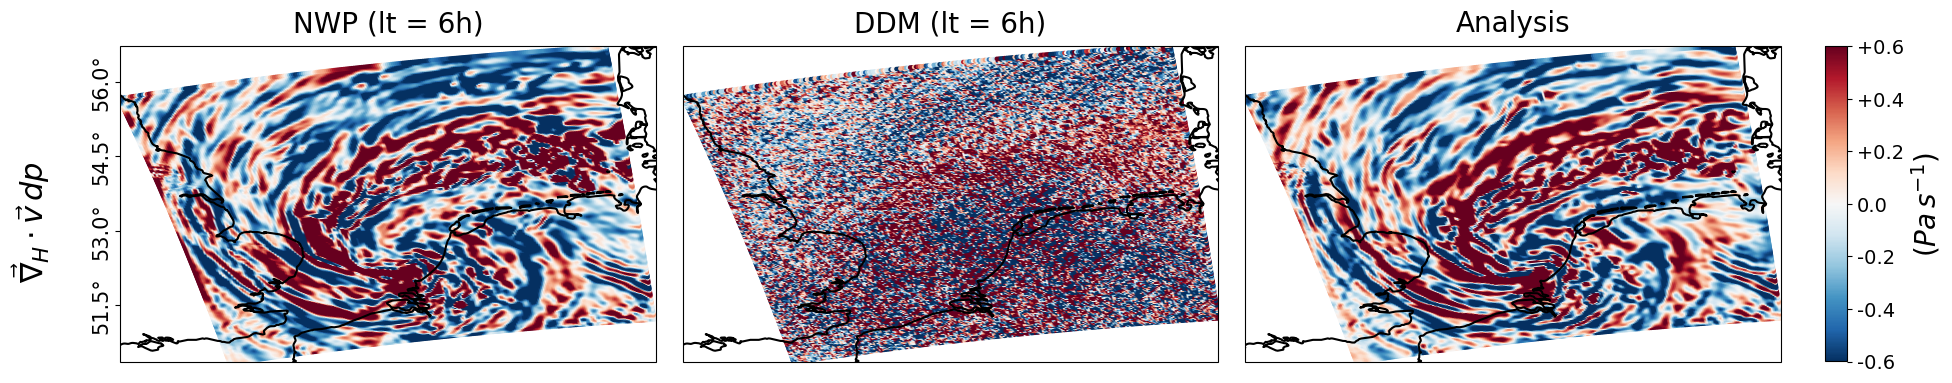

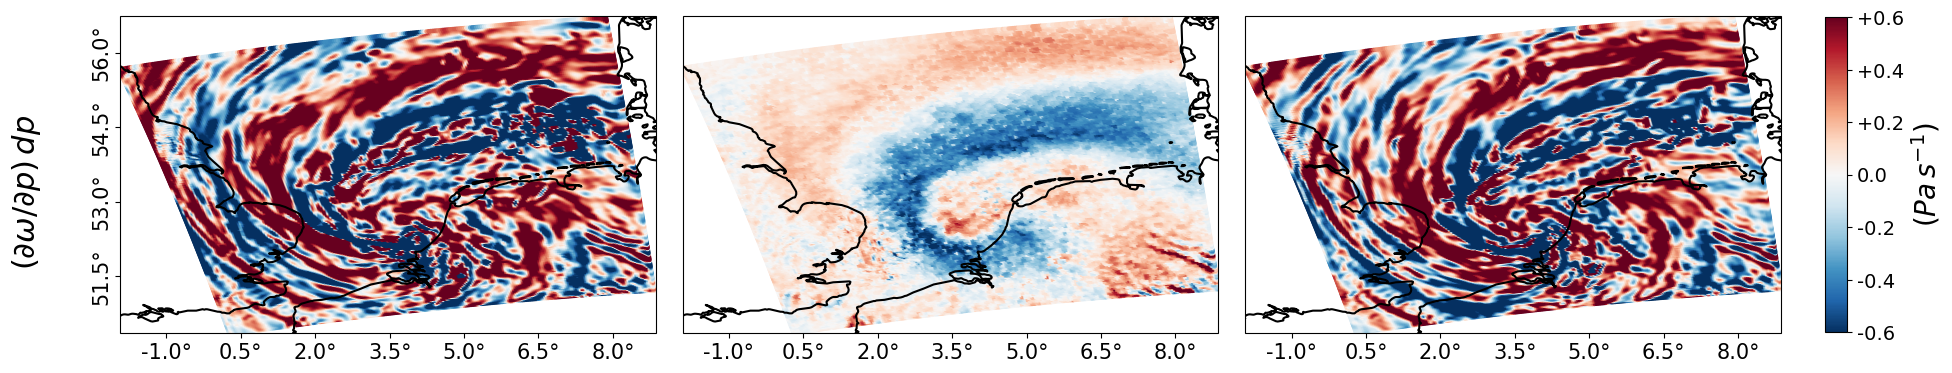

In [146]:
LL = 11    
lat_DDM = [0,250]
lon_DDM = [0,250]
lat_NWP = [0,250]
lon_NWP = [0,250]
global_min = -0.6
global_max = +0.6
norm_geo_bal = plt.Normalize(vmin=global_min, vmax=global_max)
cmap_geo_bal = plt.get_cmap('RdBu_r')
plot_balances_distribution_3plots(
    NWP_pred_00_0507, DDM_pred_00_0507,
    lat_NWP, lon_NWP, lat_DDM, lon_DDM,
    integral_dhw_NWP_pred[LL,4,lat_NWP[0]:lat_NWP[1],lon_NWP[0]:lon_NWP[1]],
    integral_dhw_DDM_pred[LL,4,lat_DDM[0]:lat_DDM[1],lon_DDM[0]:lon_DDM[1]],
    integral_dhw_NWP_gt[LL,4,lat_NWP[0]:lat_NWP[1],lon_NWP[0]:lon_NWP[1]],
    cmap_pred=cmap_geo_bal, cmap_gt=cmap_geo_bal,
    norm_pred=norm_geo_bal, norm_gt=norm_geo_bal,
    titles=['NWP (lt = 6h)','DDM (lt = 6h)', 'Analysis'],
    colorbar_label=r"$(Pa\,s^{-1})$",    
    show_titles=True,
    ylabel=r"$\vec{\nabla}_H \cdot \vec{v} \, dp$",
    save_path = "",
    show_longitudes = False,
    lat_ticks_custom=[51.5, 53, 54.5, 56],      
    lon_ticks_custom=[-1, 0.5, 2, 3.5, 5, 6.5, 8]     
)


LL = 11     
lat_DDM = [0,250]
lon_DDM = [0,250]
lat_NWP = [0,250]
lon_NWP = [0,250]
global_min = -0.6
global_max = +0.6
norm_geo_bal = plt.Normalize(vmin=global_min, vmax=global_max)
cmap_geo_bal = plt.get_cmap('RdBu_r')
plot_balances_distribution_3plots(
    NWP_pred_00_0507, DDM_pred_00_0507,
    lat_NWP, lon_NWP, lat_DDM, lon_DDM,
    difference_wp_NWP_pred[LL,4,lat_NWP[0]:lat_NWP[1],lon_NWP[0]:lon_NWP[1]],
    difference_wp_DDM_pred[LL,4,lat_DDM[0]:lat_DDM[1],lon_DDM[0]:lon_DDM[1]],
    difference_wp_NWP_gt[LL,4,lat_NWP[0]:lat_NWP[1],lon_NWP[0]:lon_NWP[1]],
    cmap_pred=cmap_geo_bal, cmap_gt=cmap_geo_bal,
    norm_pred=norm_geo_bal, norm_gt=norm_geo_bal,
    titles=['NWP (lt = 6h)','DDM (lt = 6h)', 'Analysis'],
    colorbar_label=r"$(Pa\,s^{-1})$",     
    show_titles=False, 
    ylabel=r"$(\partial \omega/\partial p) \, dp$",
    save_path = "",
    show_longitudes = True,
    lat_ticks_custom=[51.5, 53, 54.5, 56],     
    lon_ticks_custom=[-1, 0.5, 2, 3.5, 5, 6.5, 8]        
)